## matplotlibの使い方
jupyter内で結果を出力するためには，以下のコマンドが必要
%matplotlib inline

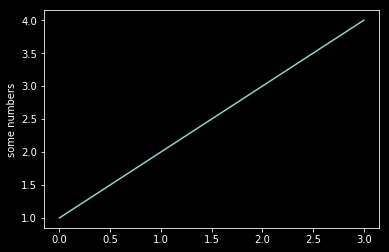

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

## couchdb
変数dbを生成

In [2]:
import couchdb
server = couchdb.Server('http://foodcomputer-db.akg.t.u-tokyo.ac.jp:5984/')
db = server['environmental_data_point']
len(db)

ImportError: No module named couchdb

DBからセンサデータリストを生成

In [6]:
%matplotlib inline
import couchdb
import datetime
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def convertToDateTimeObj(unixTime):
        return datetime.datetime.fromtimestamp(
            unixTime
        )
'''
def connectDB():
    server = couchdb.Server('http://foodcomputer-db.akg.t.u-tokyo.ac.jp:5984/')
    return  server['environmental_data_point']

'''

def getSensorDataList(env_name,db,limit=1000):
    map_fun = '''function(doc) {{
        if (doc.variable == '{}')
            emit(doc.timestamp, doc.value);
    }}'''.format(env_name)
    
    row_list = db.query(map_fun, descending=True, limit=limit)
    value_list = [row.value for row in row_list]
    date_list = [convertToDateTimeObj(row.key) for row in row_list]
    
    return {"date_list":date_list, "value_list":value_list}

def plotSensorData(env_name,limit):
    server = couchdb.Server('http://foodcomputer-db.akg.t.u-tokyo.ac.jp:5984/')
    db = server['environmental_data_point']
    date_value = getSensorDataList(env_name,db, limit)
    #date_list = matplotlib.dates.date2num(date_value['date_list'])
    date_list = date_value['date_list']
    value_list = date_value['value_list']

    plt.plot(date_list,value_list,linestyle='None',marker='.')
    plt.gcf().autofmt_xdate()
    #plt.ylim(0,8)
    plt.show()
    return (date_list, value_list)

#def plotSensorData(env_name):    



(0, 5)

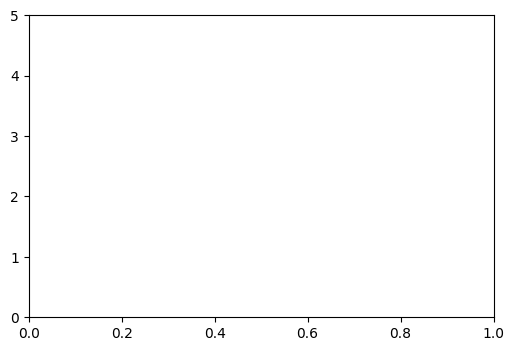

In [3]:
plt.ylim(0,5)

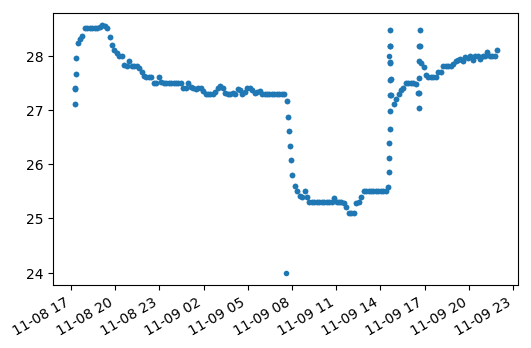

In [7]:
date_list_temp, temp_list = plotSensorData('air_temperature', 400)

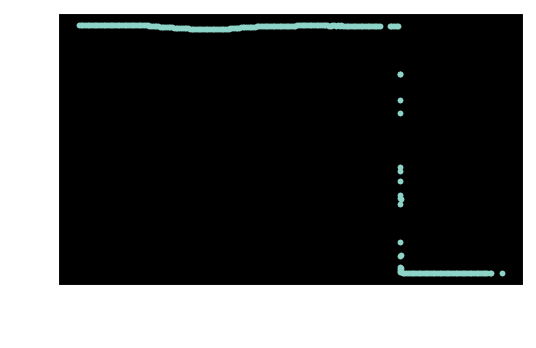

In [8]:
date_list_temp, temp_list = plotSensorData('water_temperature', 500)

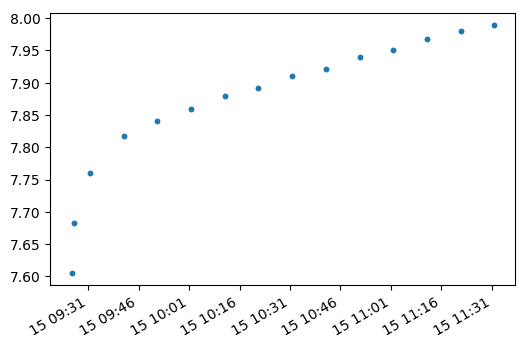

In [12]:
date_list_temp, temp_list = plotSensorData('water_potential_hydrogen', 30)


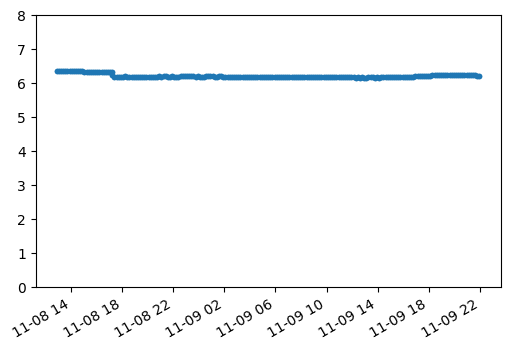

In [20]:
date_list_ph, ph_list = plotSensorData('water_potential_hydrogen',400)

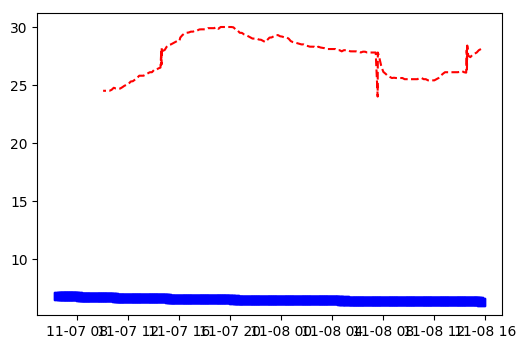

In [24]:
plt.plot(date_list_temp, temp_list, 'r--', date_list_ph, ph_list, 'bs')
plt.show()

In [ ]:
plotSensorData('air_carbon_dioxide',400)

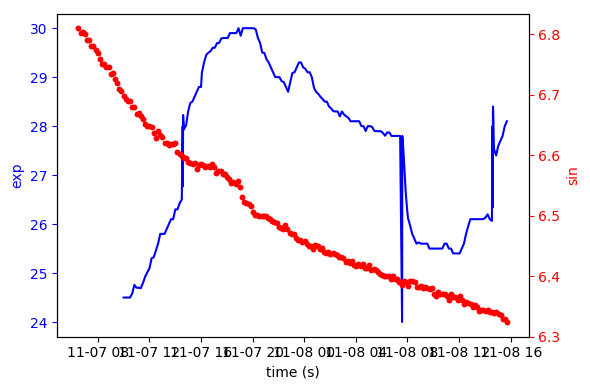

In [26]:
import numpy as np

fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(date_list_temp, temp_list, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = np.sin(2 * np.pi * t)
ax2.plot(date_list_ph, ph_list, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [ ]:
plotSensorData('air_humidity',400)

In [ ]:
plotSensorData('light_intensity_white',10)

In [ ]:
plotSensorData('nutrient_flora_duo_a')

In [ ]:
plotSensorData('nutrient_flora_duo_b')

## 9/15
データベースに格納されている時刻が正しいか評価する


In [ ]:
data_obj = getSensorDataList('water_electrical_conductivity',db,limit=50)
print(data_obj)

In [ ]:
convertToDateTimeObj(1505364171.218129)